Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
- Edit your picture to be 256x256 pixels, grayscale (single channel)
- Plot your edited face
- Calculate and plot the average face of the cohort.
- How distant is your face from the average? How would you measure it

In [1]:
# Importing the necessary Packages.
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [3]:
# Image directory
file = 'Imagen Processing'
path = os.path.abspath(file)
folder = os.path.dirname(path)
input_folder = os.path.join(folder, 'intput_images')
output_folder = os.path.join(folder, 'output_images')

In [4]:
# Google app authentication
gauth = GoogleAuth()
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=343828882849-7jj2nfajt4qbj157t139l3m1sd8nqq4b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [5]:
# Search the folder by name
folder_list = drive.ListFile({'q': "title='pictureFace' and mimeType='application/vnd.google-apps.folder' and trashed=false"}).GetList()
# Gets the folder ID
folder_id = folder_list[0]['id']

In [6]:
# Find the image files in the folder
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
for file in file_list:
    file.GetContentFile(os.path.join(input_folder, file['title']))

**Edit your picture to be 256x256 pixels, grayscale (single channel)**

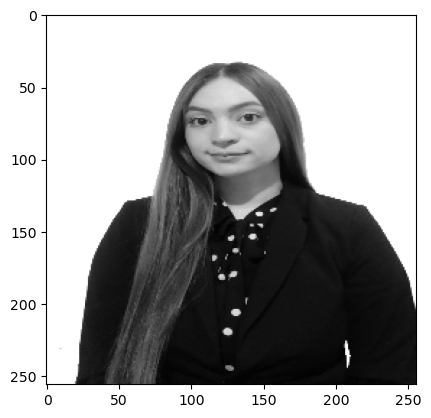

In [7]:
# Edit my image
my_img = cv2.imread('Imagen.jpeg')
my_img_gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_img_edited = cv2.resize(my_img_gray, (256, 256))
plt.imshow(my_img_edited,cmap='gray')

**Add a steady, well-centered picture of your face to a shared folder alongside your classmates**

In [8]:
def image_format(img,input_folder,ouput_filder):
        '''
        Edit and format the image
        '''
        img = Image.open(os.path.join(input_folder, img))
        img = img.convert("L")
        img = img.resize((256, 256))
        img = np.array(img)
        return img

In [9]:
# Load  the images
faces = []
for file in os.listdir(input_folder):
    img=image_format(file,input_folder,output_folder)
    faces.append(img)

**Calculate and plot the average face of the cohort**

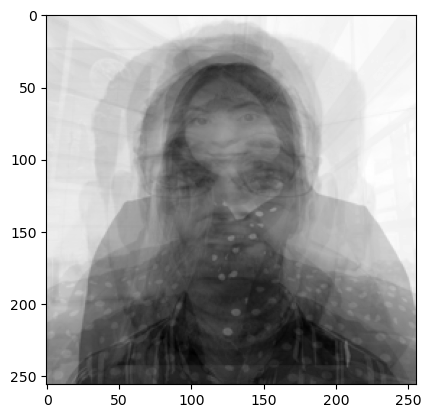

In [10]:
average_face = np.mean(faces, axis=0)
plt.imshow(average_face, cmap='gray')
plt.show()

**How distant is your face from the average? How would you measure it?**

To measure the distance between my face and the average face, I used the Euclidean distance to calculate the difference of the elements between the two images, squared the differences, added them, took the square root and returned the result I get a value that says how far my face is different from the average face.

In [11]:
distance = np.sqrt(np.sum((my_img_edited - average_face)**2))
distance

19062.55389728078